In [103]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import sklearn

In [104]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [106]:
df.isnull().sum()
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4372\3067225244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


In [107]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [108]:
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [109]:
x=df['horsepower']
y=df['mpg']

In [110]:
x.mean()

np.float64(104.30402010050251)

In [111]:
y.mean()

np.float64(23.514572864321607)

In [112]:
m = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
print(m)

-0.15816020313402757


In [113]:
c = y.mean()-m*x.mean()
print(c)

40.01131787111278


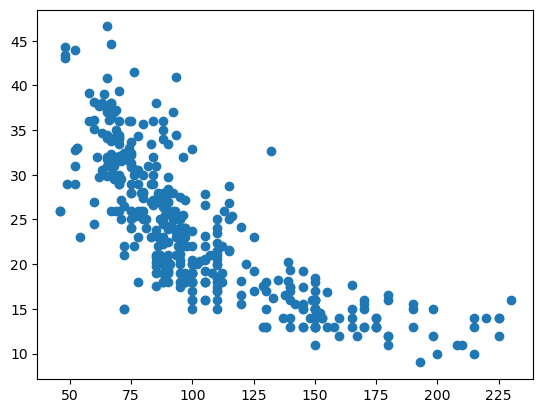

In [114]:
plt.scatter(x,y)
plt.show()

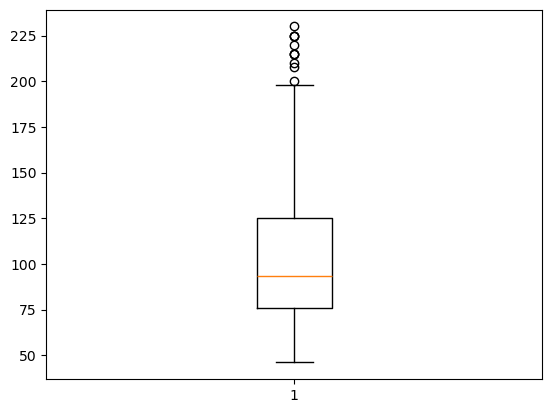

In [115]:
plt.boxplot(x)
plt.show()

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train) 


LinearRegression()

In [120]:
df[['horsepower','mpg']].corr()


,horsepower,mpg
horsepower,1.000000,-0.773453
mpg,-0.773453,1.000000


In [121]:
print("intercept:",model.intercept_)
print("slope:",model.coef_[0])

intercept: 40.51716423366812
slope: -0.16395719614905893


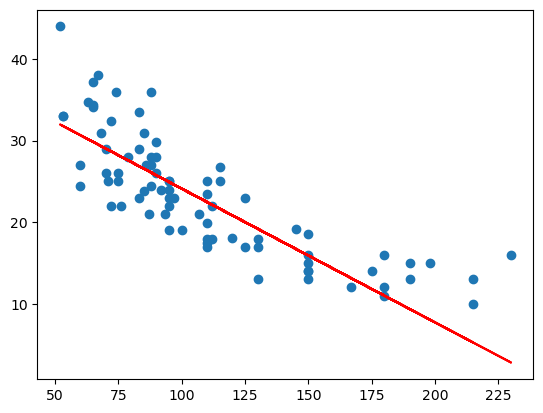

In [122]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test.values.reshape(-1,1)),color='red')
plt.show()